# Looking at the Big Picture

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Getting the Data

In [ ]:

path = "https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Train.csv"
df = pd.read_csv(path)

## An overview of the Data

In [ ]:

df.drop(["id","host_id"],axis = 1)

%matplotlib inline 
import matplotlib.pyplot as plt

df.hist(bins = 25, figsize = (20,15))
plt.show()

In [ ]:
df["neighbourhood_group"].value_counts()


### Neighbourhood_group

In [ ]:
# import plotly.express as px
# import folium

# stays_lat_long = df.groupby('neighbourhood_group').first().loc[:, ['longitude', 'latitude']].assign(
#     n = df.groupby('neighbourhood_group').neighbourhood.count()
# )

# m = folium.Map(
#     location=[40.76, -73.895],
#     zoom_start=4
# )

# max_n_stays = stays_lat_long.n.max()

# stays_lat_long.apply(lambda ll: folium.Circle(radius=2000 * (ll.n / max_n_stays),
#                                               location=[ll.latitude, ll.longitude],
#                                               fill=True,
#                                               color='indianred',
#                                               popup=ll.name).add_to(m), axis='columns')

# m

### Neighbourhood 

In [ ]:
# import folium

# stays_lat_long = df.groupby('neighbourhood').first().loc[:, ['longitude', 'latitude']].assign(
#     n = df.groupby('neighbourhood').neighbourhood.count()
# )

# m = folium.Map(
#     location=[40.76, -73.895],
#     zoom_start=4
# )

# max_n_stays = stays_lat_long.n.max()

# stays_lat_long.apply(lambda ll: folium.Circle(radius=2000 * (ll.n / max_n_stays),
#                                               location=[ll.latitude, ll.longitude],
#                                               fill=True,
#                                               color='indianred',
#                                               popup=ll.name).add_to(m), axis='columns')

# m

In [ ]:
df["neighbourhood"].value_counts()

In [ ]:
df["room_type"].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['neighbourhood_group','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
df.groupby(['neighbourhood','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
week = df[df["minimum_nights"] < 7] 
week.shape

In [ ]:
df.groupby(['neighbourhood','minimum_nights']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
month = df[df["minimum_nights"] <= 30] 
month.shape

In [ ]:

s_grouped = df.groupby(['neighbourhood_group', 'room_type'])['price']
s_grouped.mean()

In [ ]:

ng_grouped = df.groupby(['neighbourhood_group', 'neighbourhood','room_type'])['price']
ng = ng_grouped.median()
ng

In [ ]:
df[["price"]].describe()

### Insights - Insights
- Mean > Median
- Till 75%, maximum price is 175. But, for Q4, it reaches 10000.So, price is between 175 to 10000. So, check outliers.
- Q3 - Q1 = 106

In [ ]:
df_75 = df[df["price"] > 4999]
df_75["neighbourhood_group"].value_counts()

In [ ]:
df_1 = df[df["price"] < 100]
df_1["neighbourhood_group"].value_counts()

In [ ]:
df_1.groupby(['neighbourhood_group','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
bronx = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[:48]

In [ ]:
brooklyn = df.pivot_table(index=['neighbourhood_group','neighbourhood']).iloc[49:95]

In [ ]:
manhattan = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[96:127]

In [ ]:
queens = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[127:178]

In [ ]:
island = df.pivot_table(index=['neighbourhood_group', 'neighbourhood']).iloc[178:]

In [ ]:
df.groupby(["neighbourhood_group"]).mean()

In [ ]:
data = df["price"]

plt.plot(data)

In [ ]:

data_1 = df[df["price"] < 1500]

d_1 = data_1["price"]

plt.plot(d_1)

In [ ]:
data_2 = df[df["price"] > 1500]

d_2 = data_2["price"]
plt.plot(d_2)

In [ ]:
df.groupby('neighbourhood')['price'].nunique().plot(kind='bar', figsize = (20,8))
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(3, 2, figsize=(14, 12))
plt.suptitle('StayZe Property Breakdown', fontsize=18)
f.subplots_adjust(hspace=0.5)

sns.kdeplot(df.price, ax=axarr[0][0])
axarr[0][0].set_title("Room Price")

sns.kdeplot(df.price.where(lambda v: v <= 500), ax=axarr[0][1])
axarr[0][1].set_title("Room Price < 500 Rupees (Detail)")

sns.countplot(df.neighbourhood_group, ax=axarr[1][0])
axarr[1][0].set_title("neighbourhood group")

sns.countplot(df.room_type, ax=axarr[1][1])
axarr[1][1].set_title("Occupants Permitted")

sns.kdeplot(df.price.where(lambda v : v <200), ax=axarr[2][0])
axarr[2][0].set_title("Room Price < 200")

sns.kdeplot(df.price.where(lambda v: v <= 300 ), ax=axarr[2][1])
axarr[2][1].set_title("Room Price < 500 Rupees (Detail)")


sns.despine()

## Code to calculate the distance between two points on Earth using lattitues and longitudes

In [ ]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.70844)
lon1 = radians(-74.00615)
lat2 = radians(40.70724)
lon2 = radians(-74.00614)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Distance in meters:", distance*1000)

### With the distances from the market, we can get more appropriate picture of Data. So, Sharing an updated file

### Downlaoding the updated Data

In [ ]:
path_ss = "https://raw.githubusercontent.com/Vyaghri-Sista/RentalProperty-prediction/main/Mod_Data.csv"
df1 = pd.read_csv(path_ss,encoding="ISO-8859-1")


### Taking a Quick Look at the data

In [ ]:
df1.head()

In [ ]:
df1.info()

### Non Zero values wrt total rows in "price" column

In [ ]:
print("Non Zero Values : " , np.count_nonzero(df1['price'], axis=0))
print("Total rows in price Column : " , df1['price'].shape)

### Checking null Values 

In [246]:
df1.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
Distance in m                        0
dtype: int64

## Now, we are analyzing the dataset developed in two ways 

### Sunny Sir

In [275]:
X_enc_rt = pd.get_dummies(df1.room_type, prefix='roomtype')
X_enc_nh = pd.get_dummies(df1.neighbourhood_group, prefix='nbg')
X_enc_ng = pd.get_dummies(df1.neighbourhood, prefix='nb')

In [276]:
Var = pd.concat([df1, X_enc_rt,X_enc_nh,X_enc_ng], axis=1)

In [277]:
D1=Var[(Var['price'] > 0)]
#D2=D1.iloc[:,7:26]
n1=np.log(D1['price'])
D1['price new']=n1
D1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,nb_Westchester Square,nb_Westerleigh,nb_Whitestone,nb_Williamsbridge,nb_Williamsburg,nb_Windsor Terrace,nb_Woodhaven,nb_Woodlawn,nb_Woodside,price new
0,0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,...,0,0,0,0,0,0,0,0,0,4.787492
1,1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,...,0,0,0,0,0,0,0,0,0,7.313220
2,2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,...,0,0,0,0,0,0,0,0,0,5.298317
3,3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,...,0,0,0,0,0,0,0,0,0,3.401197
4,4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,...,0,0,0,0,0,0,0,0,0,4.744932


In [278]:
D1.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type',
       ...
       'nb_Westchester Square', 'nb_Westerleigh', 'nb_Whitestone',
       'nb_Williamsbridge', 'nb_Williamsburg', 'nb_Windsor Terrace',
       'nb_Woodhaven', 'nb_Woodlawn', 'nb_Woodside', 'price new'],
      dtype='object', length=244)

In [279]:
D1.drop(["Unnamed: 0","id","host_name","last_review","reviews_per_month","neighbourhood","neighbourhood_group","room_type"], axis = 1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


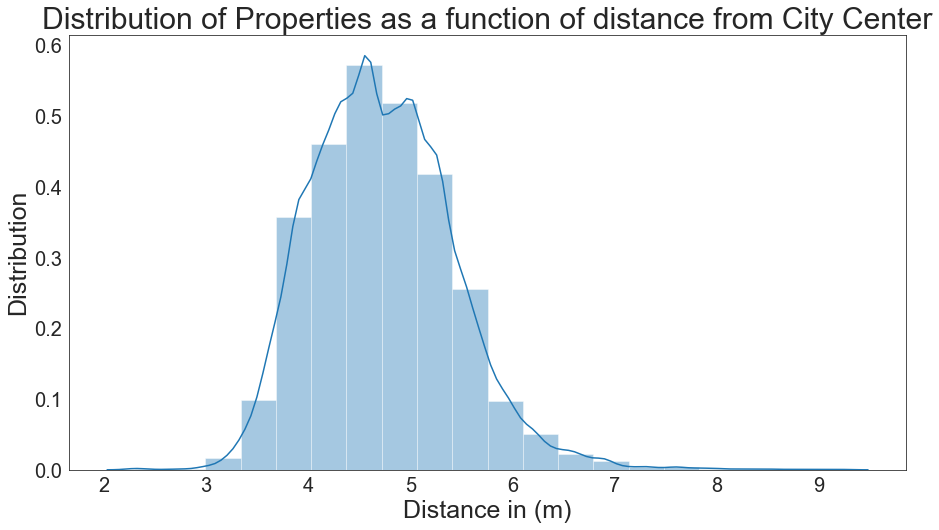

In [280]:
figure =plt.figure(figsize=(15,8))
sns.distplot(D1['price new'],bins=20)
plt.title('Distribution of Properties as a function of distance from City Center', fontsize=30)
plt.xlabel('Distance in (m)',fontsize=25)
plt.ylabel('Distribution',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [281]:
D2=D1[(D1['price new'] >=3 )&(D1['price new'] <= 6.5)]
#D2=D1
D2.columns

Index(['name', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'Distance in m',
       ...
       'nb_Westchester Square', 'nb_Westerleigh', 'nb_Whitestone',
       'nb_Williamsbridge', 'nb_Williamsburg', 'nb_Windsor Terrace',
       'nb_Woodhaven', 'nb_Woodlawn', 'nb_Woodside', 'price new'],
      dtype='object', length=236)

In [284]:
D2[["host_id"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33664 entries, 0 to 34225
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   host_id  33664 non-null  int64
dtypes: int64(1)
memory usage: 526.0 KB


In [285]:
D2.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Distance in m,roomtype_Entire home/apt,...,nb_Westchester Square,nb_Westerleigh,nb_Whitestone,nb_Williamsbridge,nb_Williamsburg,nb_Windsor Terrace,nb_Woodhaven,nb_Woodlawn,nb_Woodside,price new
host_id,1.000000,0.021219,0.132149,0.018251,-0.015257,-0.141965,0.152088,0.198127,0.065759,-0.079122,...,0.011058,0.008010,0.002034,0.015522,-0.086768,-0.021172,0.021946,0.003726,0.035733,-0.028003
latitude,0.021219,1.000000,0.085828,0.064280,0.024882,-0.013446,0.018066,-0.013723,-0.725806,-0.008199,...,0.029069,-0.016213,0.017551,0.087086,-0.088944,-0.074924,-0.029379,0.047956,0.021757,0.077192
longitude,0.132149,0.085828,1.000000,-0.283994,-0.064743,0.053609,-0.115052,0.090508,0.332691,-0.187345,...,0.032729,-0.030381,0.049774,0.064112,-0.000608,-0.031244,0.086847,0.028376,0.075266,-0.333587
price,0.018251,0.064280,-0.283994,1.000000,0.024598,-0.049441,0.143370,0.096558,-0.247545,0.537172,...,-0.010669,-0.005112,-0.003668,-0.011078,0.011989,0.002087,-0.031011,-0.012210,-0.034069,0.923283
minimum_nights,-0.015257,0.024882,-0.064743,0.024598,1.000000,-0.078701,0.129179,0.142793,-0.063811,0.079257,...,-0.003312,-0.001688,-0.004205,-0.000612,-0.004859,0.010759,-0.009156,-0.004146,0.010508,0.024630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nb_Windsor Terrace,-0.021172,-0.074924,-0.031244,0.002087,0.010759,0.007718,-0.009299,-0.009728,0.069933,0.026266,...,-0.000795,-0.000425,-0.000950,-0.001753,-0.016397,1.000000,-0.002387,-0.000850,-0.003904,0.007545
nb_Woodhaven,0.021946,-0.029379,0.086847,-0.031011,-0.009156,0.012087,-0.003977,0.032495,0.050993,-0.026902,...,-0.000624,-0.000334,-0.000746,-0.001377,-0.012879,-0.002387,1.000000,-0.000668,-0.003067,-0.041593
nb_Woodlawn,0.003726,0.047956,0.028376,-0.012210,-0.004146,0.012100,-0.002438,0.001418,0.023829,-0.000519,...,-0.000222,-0.000119,-0.000266,-0.000490,-0.004586,-0.000850,-0.000668,1.000000,-0.001092,-0.016827
nb_Woodside,0.035733,0.021757,0.075266,-0.034069,0.010508,-0.008963,0.027492,0.010236,-0.017231,-0.034439,...,-0.001021,-0.000546,-0.001221,-0.002252,-0.021064,-0.003904,-0.003067,-0.001092,1.000000,-0.046932


In [288]:
X = D2.drop(["name","host_id","latitude","longitude","number_of_reviews","price","calculated_host_listings_count",],axis = 1)
y =D2["price new"]
X.shape,y.shape

((33664, 229), (33664,))

In [290]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10000)
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.9999999999999998

In [291]:
sklr.intercept_,sklr.coef_

(5.272240815479279e-06,
 array([ 6.10827556e-15, -1.24547725e-16,  7.22349697e-17, -1.64474093e-06,
        -1.64474087e-06, -1.64474061e-06, -3.94850465e-06, -4.80408867e-06,
        -1.25026481e-07, -3.87168623e-06, -3.44932136e-06,  3.21004299e-07,
        -1.78179423e-07, -1.78179364e-07,  2.44185198e-07,  2.44186048e-07,
         1.17658792e-06, -3.50247149e-06,  1.17658803e-06,  2.44185751e-07,
        -1.09950042e-06,  3.21003963e-07,  2.44185439e-07,  2.44184851e-07,
         1.17658799e-06,  2.44185374e-07,  2.44185159e-07,  3.21004301e-07,
         1.17658784e-06,  1.17658784e-06,  1.17658845e-06,  1.17658772e-06,
         2.44184462e-07,  2.44185515e-07,  1.17658777e-06,  3.21004390e-07,
         1.17658843e-06,  1.17658803e-06, -1.78180579e-07,  1.17658867e-06,
         2.44184947e-07,  1.17658788e-06,  1.17658847e-06,  3.21004180e-07,
        -1.78180299e-07, -3.50247354e-06, -3.50247385e-06,  3.21003807e-07,
        -3.50247452e-06,  3.21005230e-07,  3.21004315e-07, -1.78

In [292]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9999997795379422

In [293]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.062096774699438306

In [295]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('lr', sklr), ('rf', rf)])
er.fit(X_train,y_train)
er.score(X_test,y_test)

0.9999999453425183

In [296]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)

0.9335816448990303

In [297]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train,y_train)
elastic_net.score(X_train,y_train)

0.9484643236531054

In [ ]:
from sklearn.metrics import mean_squared_error
X

In [ ]:
# Checking Importance of Missing Values

## Naidu Sir's Data

In [196]:
df_new = df1[["price","Distance in m", "availability_365","minimum_nights","number_of_reviews","calculated_host_listings_count"]]
df_new.describe()

,price,Distance in m,availability_365,minimum_nights,number_of_reviews,calculated_host_listings_count
count,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,153.480979,4126.813902,113.301730,6.953690,23.390931,7.093905
std,243.312608,2378.330009,131.892814,20.255833,44.476822,32.828412
min,0.000000,37.825129,0.000000,1.000000,0.000000,1.000000
25%,69.000000,2272.201619,0.000000,1.000000,1.000000,1.000000
50%,107.000000,3843.818246,45.000000,2.000000,5.000000,1.000000
75%,175.000000,5610.752609,229.000000,5.000000,24.000000,2.000000
max,10000.000000,19435.532320,365.000000,1250.000000,629.000000,327.000000


In [197]:
df_new.corr() # need scaling, I guess

,price,Distance in m,availability_365,minimum_nights,number_of_reviews,calculated_host_listings_count
price,1.000000,-0.121383,0.083439,0.045746,-0.048459,0.053688
Distance in m,-0.121383,1.000000,0.077678,-0.063148,0.044560,-0.075033
availability_365,0.083439,0.077678,1.000000,0.142466,0.176161,0.223409
minimum_nights,0.045746,-0.063148,0.142466,1.000000,-0.078890,0.128552
number_of_reviews,-0.048459,0.044560,0.176161,-0.078890,1.000000,-0.072643
calculated_host_listings_count,0.053688,-0.075033,0.223409,0.128552,-0.072643,1.000000


# Price Distribution (Actual Dataset)

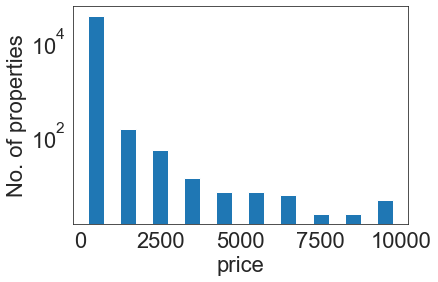

In [198]:
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (15,10)
plt.yscale('log')
plt.hist(df1.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

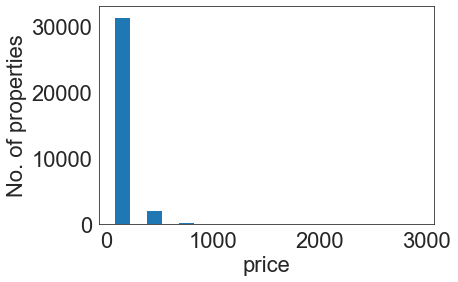

In [199]:
df2 = df1[df1.price<3000]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

### An Important Insight - Price distribution (price<500)
- Majority of the properties (about 1/3 rd) are priced around 100 dollars
- Only 892 properties cost more than 500 dollars

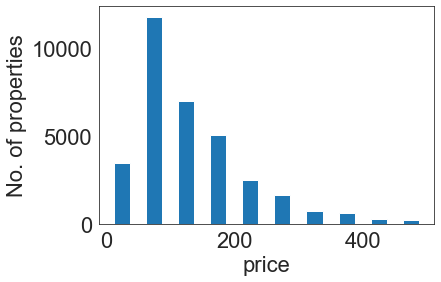

In [200]:

df2 = df1[df1.price < 500]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

In [201]:

df2 = df1[df1.price>=500]
df2.shape

(892, 18)

### Total Neighbourhood Groups

In [202]:
#Total neighbourhood_groups
df1['neighbourhood_group'].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

### Insights related to Hosts

In [203]:
df1["host_name"].value_counts()

Michael            291
David              290
Sonder (NYC)       229
John               208
Alex               199
                  ... 
Fleur                1
Onome                1
Rabi & Soukaina      1
Holden               1
Bud                  1
Name: host_name, Length: 9290, dtype: int64

### Finding average price of top host "Michael" by 'room_type'

In [204]:
df1_michael = df1[ df1['host_name']=='Michael']
df1_michael.groupby('room_type')['price'].mean()

room_type
Entire home/apt    195.715909
Private room        81.266667
Shared room         72.100000
Name: price, dtype: float64

### Finding average price of top host "Michael" by ' neighbourhood'

In [205]:
df1_michael.groupby('neighbourhood')['price'].mean()

neighbourhood
Arverne                      300.000000
Astoria                       98.000000
Bay Ridge                    135.000000
Bedford-Stuyvesant            75.750000
Boerum Hill                  145.000000
Brighton Beach                83.333333
Brooklyn Heights             170.000000
Bushwick                      92.105263
Carroll Gardens              125.000000
Chelsea                      206.440000
Chinatown                    195.000000
Claremont Village            150.000000
Clinton Hill                 121.250000
Concord                      120.000000
Concourse Village             85.000000
Crown Heights                119.000000
East Harlem                   77.000000
East New York                 33.000000
East Village                 165.916667
Financial District           145.000000
Flatbush                     100.000000
Flatiron District            400.000000
Gowanus                      125.000000
Gramercy                     202.000000
Greenpoint                

### Costliest Hosts

In [206]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).head(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
29644,Erin,Brooklyn,Greenpoint,Entire home/apt,10000
12404,Jelena,Manhattan,Upper West Side,Entire home/apt,10000
12523,Matt,Manhattan,Lower East Side,Entire home/apt,9999
20810,Amy,Manhattan,Lower East Side,Private room,9999
23350,Rum,Manhattan,Tribeca,Entire home/apt,8500
31293,Jessica,Brooklyn,Clinton Hill,Entire home/apt,8000
3719,Sally,Manhattan,Upper East Side,Entire home/apt,7703
15974,Jack,Manhattan,Battery Park City,Entire home/apt,7500
7817,Kevin,Manhattan,Chelsea,Entire home/apt,6800
3754,Jonathan,Brooklyn,Clinton Hill,Entire home/apt,6500


### Hosts providing Cheapest Homestays 

In [207]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).tail(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
23016,Rachel,Brooklyn,Sunset Park,Entire home/apt,10
26630,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0
2133,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
32184,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0
30259,Martial Loft,Brooklyn,Bushwick,Private room,0
25414,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0
21441,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
11311,Sergii,Brooklyn,Bushwick,Shared room,0
25277,Lauren,Brooklyn,Greenpoint,Private room,0
11638,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0


### Finding costly host_names for a 'Entire home/apt' in the most popular locality: Williamsburg, Brooklyn

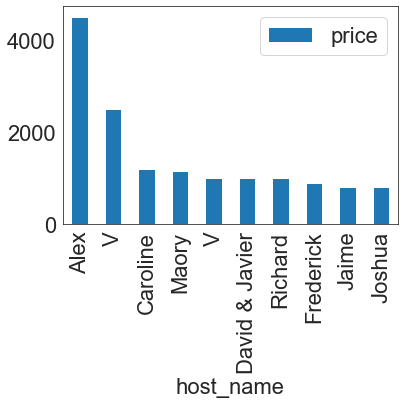

In [208]:

df_apt = df1[ df1['room_type']=='Entire home/apt']

df_brook_apt = df_apt[ df_apt['neighbourhood_group']=='Brooklyn']

#df4 = df3[ df3['host_name']=='Sonder (NYC)']

#df3['neighbourhood'].value_counts()

df_will_brook_apt=df_brook_apt[df_brook_apt['neighbourhood']=='Williamsburg']

df_will_brook_apt_clean = df_will_brook_apt[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).head(10)
#plt.figure(figsize=(30,20))
df_will_brook_apt_clean.plot(kind='bar',x='host_name',y='price')

plt.show()

###  Same plot with name of property

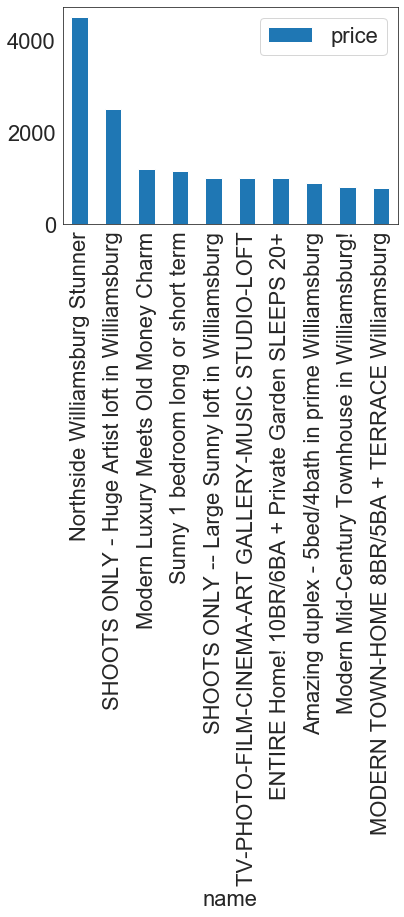

In [209]:
df_will_brook_apt_clean.plot(kind='bar',x='name',y='price')
plt.show()


### Finding cheap host_names for a 'Entire home/apt' in the most popular locality: Williamsburg, Brooklyn

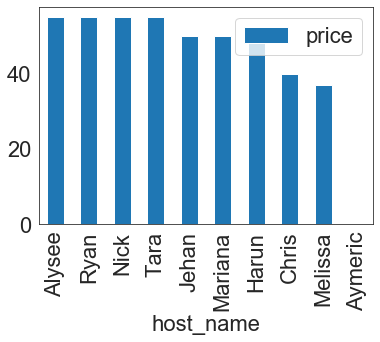

In [210]:
df_will_brook_apt_clean = df_will_brook_apt[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).tail(10)
df_will_brook_apt_clean.plot(kind='bar',x='host_name',y='price')
plt.show()

### Same plot with name of property


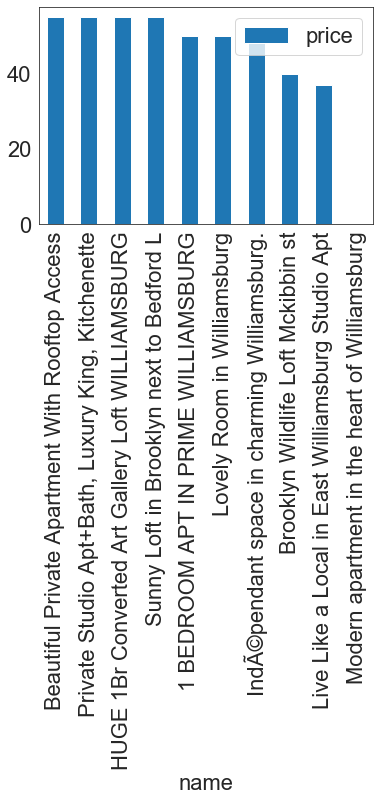

In [211]:
df_will_brook_apt_clean.plot(kind='bar',x='name',y='price')
plt.show()

In [212]:
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Distance in m'],
      dtype='object')

## Data Cleaning on df1 dataset

In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      34226 non-null  int64  
 1   id                              34226 non-null  int64  
 2   name                            34214 non-null  object 
 3   host_id                         34226 non-null  int64  
 4   host_name                       34213 non-null  object 
 5   neighbourhood_group             34226 non-null  object 
 6   neighbourhood                   34226 non-null  object 
 7   latitude                        34226 non-null  float64
 8   longitude                       34226 non-null  float64
 9   room_type                       34226 non-null  object 
 10  price                           34226 non-null  int64  
 11  minimum_nights                  34226 non-null  int64  
 12  number_of_reviews               

In [237]:
df2 = df1.drop(['Unnamed: 0','id','host_id','number_of_reviews','last_review','reviews_per_month'],axis = 1)
df2

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,Distance in m
0,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0,3531.592026
1,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,1,0,1053.236649
2,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,1,365,3625.877178
3,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,4,82,11083.756514
4,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,1,365,1928.404038
...,...,...,...,...,...,...,...,...,...,...,...,...
34221,Ridgewood retreat,Sophie,Queens,Ridgewood,40.70602,-73.90485,Entire home/apt,80,5,1,0,5117.857366
34222,Private BR & Bath near Central Park,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,Private room,137,1,1,32,418.898167
34223,Warm Home w/ Private Garden (Inwood Manhattan ...,Mary,Manhattan,Inwood,40.86912,-73.92183,Entire home/apt,195,2,1,0,5215.680099
34224,Chill Bushwick Suite,Olu Bliss,Brooklyn,Bushwick,40.69709,-73.91435,Private room,80,3,1,0,5349.763870


In [238]:
X = df2.drop("price", axis = 1)
y = df2["price"]
X.shape, y.shape

((34226, 11), (34226,))

In [239]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10000)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23958, 11), (10268, 11), (23958,), (10268,))

In [241]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

ValueError: could not convert string to float: 'Private and spacious room, 15 mins to Times Square'